In [1]:
import pandas as pd 
import numpy as np
import random
import datetime
import sklearn.linear_model as skl_lm
import matplotlib.pyplot as plt 
import utilities as utils
import fractionalDiff as fd
import pickle
import scipy.stats as sps

In [2]:
overallScores = pd.read_csv('out_data/overallScores_1_hour_BearishBTC.csv')
orders = overallScores.order.unique()
windows = overallScores.window.unique()


In [3]:
overallScores

,window,simulationDate,ticker,trainScore,testScore,alternativeMdlTestScore,strategyReturn,alternativeMdlStrategyReturn,assetReturn,order
0,2,2022-05-03 11:00:00,indicator,0,0.0,0.0,-127.92,-127.92,-127.92,0.0
1,2,2022-05-03 12:00:00,indicator,0,1.0,1.0,78.26,78.26,-78.26,0.0
2,2,2022-05-03 15:00:00,indicator,0,0.0,0.0,-183.98,-183.98,-183.98,0.0
3,2,2022-05-03 16:00:00,indicator,0,1.0,1.0,105.88,105.88,-105.88,0.0
4,2,2022-05-03 20:00:00,indicator,0,1.0,1.0,13.34,13.34,13.34,0.0
...,...,...,...,...,...,...,...,...,...,...
134295,12,2022-05-30 19:00:00,indicator,0,0.0,0.0,-634.03,-634.03,634.03,1.0
134296,12,2022-05-30 20:00:00,indicator,0,0.0,1.0,-530.35,530.35,530.35,1.0
134297,12,2022-05-30 21:00:00,indicator,0,0.0,0.0,-29.18,-29.18,-29.18,1.0
134298,12,2022-05-30 22:00:00,indicator,0,1.0,1.0,46.54,46.54,-46.54,1.0


In [5]:
aggScores = overallScores.groupby(['order', 'window']).agg({'testScore':[np.size, np.mean, sps.skew, sps.kurtosis, np.std], \
    'strategyReturn': [np.sum], 'alternativeMdlTestScore':[np.mean, sps.skew, sps.kurtosis, np.std], 'alternativeMdlStrategyReturn': [np.sum]}).droplevel(level=[0], axis = 1).reset_index()
aggScores.columns = ['order', 'window', 'count', 'testScore', 'skew', 'kurt', 'testStd', 
    'strategyReturn', 'alternativeMdlTestScore', 'amSkew', 'amKurt', 'amtestStd', 'alternativeMdlStrategyReturn']

aggScores.sort_values(by = ['alternativeMdlStrategyReturn'], ascending = True)

,order,window,count,testScore,skew,kurt,testStd,strategyReturn,alternativeMdlTestScore,amSkew,amKurt,amtestStd,alternativeMdlStrategyReturn
109,0.473684,12,653,0.473201,0.107352,-1.988476,0.499664,-10027.00,0.464012,0.144325,-1.979170,0.499085,-4555.10
43,0.157895,12,653,0.477795,0.088909,-1.992095,0.499890,-3971.72,0.464012,0.144325,-1.979170,0.499085,-4555.10
54,0.210526,12,653,0.474732,0.101201,-1.989758,0.499744,-4917.38,0.464012,0.144325,-1.979170,0.499085,-4555.10
65,0.263158,12,653,0.477795,0.088909,-1.992095,0.499890,-3775.74,0.464012,0.144325,-1.979170,0.499085,-4555.10
76,0.315789,12,653,0.480858,0.076626,-1.994128,0.500016,-4269.50,0.464012,0.144325,-1.979170,0.499085,-4555.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,0.842105,2,354,0.502825,-0.011300,-1.999872,0.500700,2095.75,0.494350,0.022600,-1.999489,0.500676,-942.59
33,0.157895,2,354,0.505650,-0.022600,-1.999489,0.500676,87.75,0.494350,0.022600,-1.999489,0.500676,-942.59
121,0.578947,2,354,0.508475,-0.033903,-1.998851,0.500636,-1377.39,0.494350,0.022600,-1.999489,0.500676,-942.59
165,0.789474,2,354,0.497175,0.011300,-1.999872,0.500700,1290.17,0.494350,0.022600,-1.999489,0.500676,-942.59


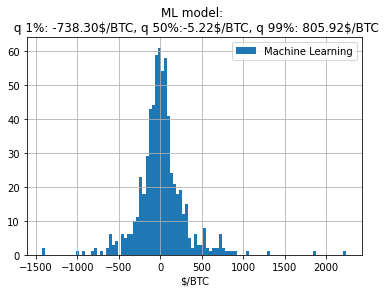

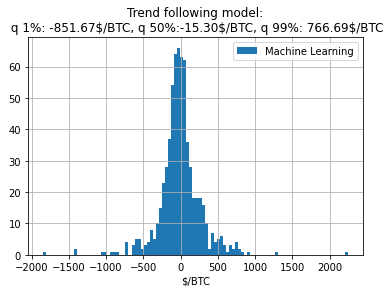

In [6]:
stats = overallScores.loc[(overallScores.order == orders[5]) & (overallScores.window == 9)]
stats.strategyReturn.hist(bins = 100)
plt.title(f'ML model: \n q 1%: {np.quantile(stats.strategyReturn, 0.01):.2f}$/BTC, q 50%:{stats.strategyReturn.median():.2f}$/BTC, q 99%: {np.quantile(stats.strategyReturn, 0.99):.2f}$/BTC')
plt.xlabel('$/BTC')
plt.legend(['Machine Learning', 'Trend Following Model'])
plt.show()
stats.alternativeMdlStrategyReturn.hist(bins = 100)
plt.title(f'Trend following model:\n q 1%: {np.quantile(stats.alternativeMdlStrategyReturn, 0.01):.2f}$/BTC, q 50%:{stats.alternativeMdlStrategyReturn.median():.2f}$/BTC, q 99%: {np.quantile(stats.alternativeMdlStrategyReturn, 0.99):.2f}$/BTC')
plt.xlabel('$/BTC')
plt.legend(['Machine Learning', 'Trend Following Model'])
plt.show()

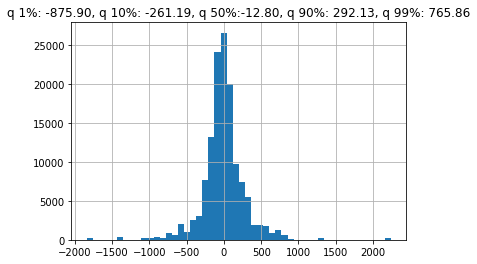

In [7]:
overallScores.alternativeMdlStrategyReturn.hist(bins = 50)
plt.title(f'q 1%: {np.quantile(overallScores.alternativeMdlStrategyReturn, 0.01):.2f}, q 10%: {np.quantile(overallScores.alternativeMdlStrategyReturn, 0.1):.2f}, q 50%:{overallScores.alternativeMdlStrategyReturn.median():.2f}, q 90%: {np.quantile(overallScores.alternativeMdlStrategyReturn, 0.9):.2f}, q 99%: {np.quantile(overallScores.alternativeMdlStrategyReturn, 0.99):.2f}')
plt.show()

In [8]:
aggScores.columns

Index(['order', 'window', 'count', 'testScore', 'skew', 'kurt', 'testStd',
       'strategyReturn', 'alternativeMdlTestScore', 'amSkew', 'amKurt',
       'amtestStd', 'alternativeMdlStrategyReturn'],
      dtype='object')

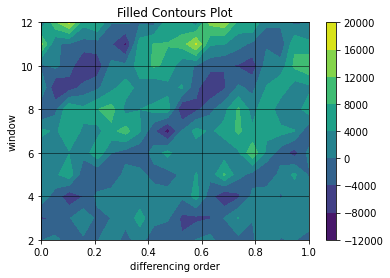

In [10]:
import numpy as np
import matplotlib.pyplot as plt
xlist = overallScores.order.unique()
ylist = overallScores.window.unique()
X, Y = np.meshgrid(xlist, ylist)
xyz = aggScores[['order', 'window', 'testScore', 'strategyReturn', 'alternativeMdlTestScore', 'alternativeMdlStrategyReturn']].copy()
Z = np.array(xyz.strategyReturn).reshape((len(xyz.window.unique()), len(xyz.order.unique())))
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('differencing order')
ax.set_ylabel('window')
plt.grid(color='black', linestyle='-', linewidth=.5)
plt.show()

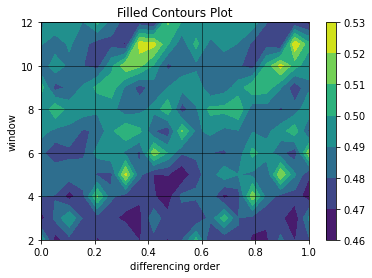

In [11]:
import numpy as np
import matplotlib.pyplot as plt
xlist = overallScores.order.unique()
ylist = overallScores.window.unique()
X, Y = np.meshgrid(xlist, ylist)
xyz = aggScores[['order', 'window', 'testScore', 'strategyReturn', 'alternativeMdlTestScore', 'alternativeMdlStrategyReturn']].copy()
Z = np.array(xyz.testScore).reshape((len(xyz.window.unique()), len(xyz.order.unique())))
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('differencing order')
ax.set_ylabel('window')
plt.grid(color='black', linestyle='-', linewidth=.5)
plt.show()

In [ ]:
firstOrderDifferences.close.hist(bins = 50)
plt.title(f'q 10%: {np.quantile(firstOrderDifferences.close, 0.1):.2f}, q 50%:{firstOrderDifferences.close.median():.2f}, q 90%: {np.quantile(firstOrderDifferences.close, 0.9):.2f}') 
plt.show()

In [30]:
scoresToPlot = aggScores.groupby(['order']).agg({'alternativeMdlTestScore':np.mean, 'alternativeMdlStrategyReturn': np.mean, 'testScore':np.mean, 'strategyReturn':np.mean}).reset_index()
scoresToPlot

,order,alternativeMdlTestScore,alternativeMdlStrategyReturn,testScore,strategyReturn
0,0.1,0.511172,9167.114286,0.520747,8505.702857
1,0.2,0.511172,9167.114286,0.517132,7818.982857
2,0.3,0.511172,9167.114286,0.516540,9556.357143
3,0.4,0.511172,9167.114286,0.520608,10505.425714
4,0.5,0.511172,9167.114286,0.523149,10928.534286
5,0.6,0.511172,9167.114286,0.521371,10385.914286
6,0.7,0.511172,9167.114286,0.518029,10366.697143
7,0.8,0.511172,9167.114286,0.522459,11999.902857
8,0.9,0.511172,9167.114286,0.522842,10977.245714
9,1.0,0.511172,9167.114286,0.524075,8747.240000


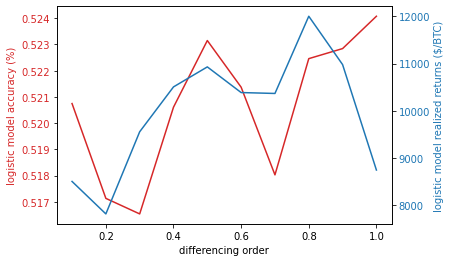

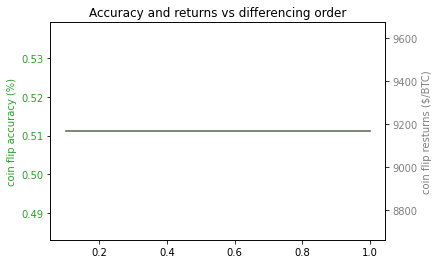

In [106]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('differencing order')
ax1.set_ylabel('logistic model accuracy (%)', color=color)
ax1.plot(scoresToPlot.order, scoresToPlot.testScore, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('logistic model realized returns ($/BTC)', color=color)  # we already handled the x-label with ax1
ax2.plot(scoresToPlot.order, scoresToPlot.strategyReturn, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.show()

fig2, ax3 = plt.subplots()

color = 'tab:green'
ax3.set_ylabel('coin flip accuracy (%)', color=color) 
ax3.plot(scoresToPlot.order, scoresToPlot.alternativeMdlTestScore, color=color)
ax3.tick_params(axis='y', labelcolor=color)

ax4 = ax3.twinx()
color = 'tab:grey'
ax4.set_ylabel('coin flip resturns ($/BTC)', color=color) 
ax4.plot(scoresToPlot.order, scoresToPlot.alternativeMdlStrategyReturn, color=color)
ax4.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title(f'Accuracy and returns vs differencing order')
plt.show()

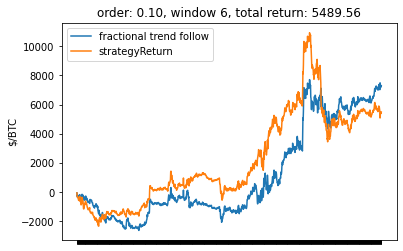

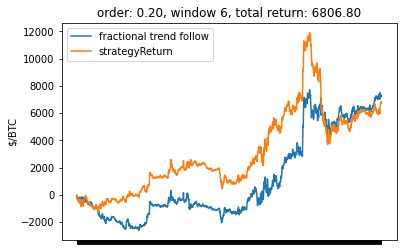

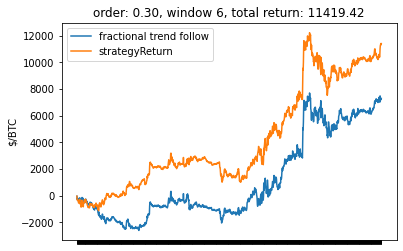

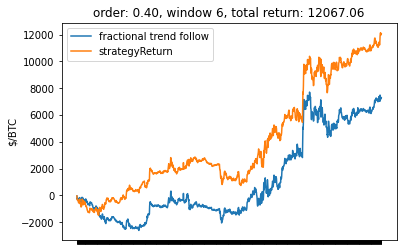

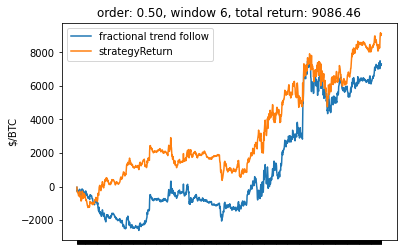

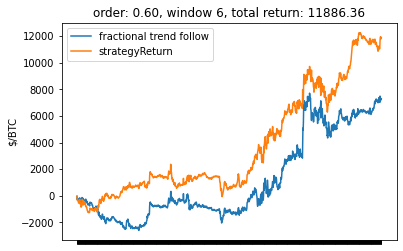

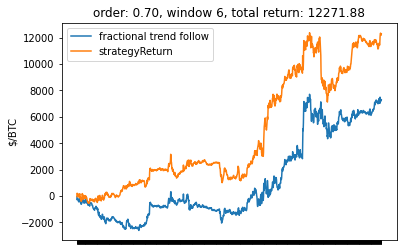

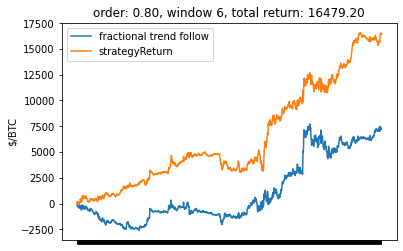

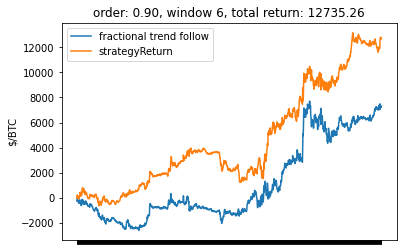

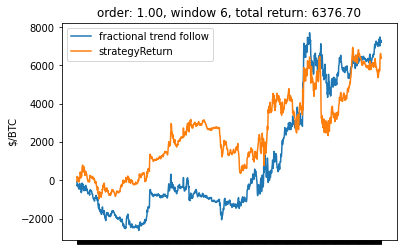

In [114]:
#for window in windows:
window = 6
#xy = scoresToPlot.loc[scoresToPlot.window == window]
for order in orders:
    #order = orders[7]
    strategyToPLot = overallScores.loc[(overallScores.window == window) & (overallScores.order == order)]
    #strategyToPLotTF = overallScoresTrendFollow.loc[(overallScoresTrendFollow.window == window) & (overallScoresTrendFollow.order == order)]
    fig, ax = plt.subplots()
    ax.plot(strategyToPLot.simulationDate, strategyToPLot.alternativeMdlStrategyReturn.cumsum())
    ax.plot(strategyToPLot.simulationDate, strategyToPLot.strategyReturn.cumsum())
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    #plt.plot(strategyToPLotTF.simulationDate, strategyToPLotTF.alternativeMdlStrategyReturn.cumsum())
    #plt.plot(scoresToPlot.order, scoresToPlot.realizedReturn)
    plt.title(f'order: {order:.2f}, window {window}, total return: {strategyToPLot.strategyReturn.sum():.2f}')
    plt.xticks(rotation = 45)
    ax.legend(['fractional trend follow', 'strategyReturn', 'trend follow'])
    plt.ylabel('$/BTC')
    plt.show()